## Procesamiento de Lenguage Natural
### Taller #7: Clasificación y Agrupación

In [25]:
# Cargar Datos
import pandas as pd
import numpy as np
import os
import re
import pandasql as sql
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))
from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
os.getcwd()
#Cambiar al directorio que contiene los datos
os.chdir(r'C:\Personal\SemestreII\AnalisisDeCasoII\Proyecto')  
#PQRD2019=pd.read_excel('Consolidado PQRD (Ene - Dic 2019).xlsx')
PQRD2020=pd.read_excel('PQRD2019New.xlsx')

## Nube de Palabras CIE10

In [26]:
#Palabras CIE 10
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from pprint import pprint

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto
PQRD2020['preCIE_10'] = PQRD2020['CIE_10'].apply(lambda texto: pre_procesado(texto))

PQRD2020.head()

,MES,TRIM,PQR_CANAL,PQR_NURC,FECHA_CREACION,PET_TIPOPER,PET_COD_DEPTO,PET_DPTO,PET_MPIO,PQR_TIPOPETICION,...,OBSERVACION,FUNCIONARIO_NOMBRE,FECHA_RADICACION,RIESGO_VIDA,ALTO_COSTO,PQR_TIPOATENCION,IDPATOLOGIA_2,IDRANGOEDADES,AÑO,preCIE_10
0,5,Trim II,Telefonico,NaN,2019-05-25,Natural,73.0,TOLIMA,IBAGUÉ,Reclamo,...,"#IVRNAL_2.2 Usuario de 61 años de edad, segú...",Maria Cristina Rodriguez Boada,2019-05-25 15:29:46.000,NO,NO APLICA,PETICION DIRECTA,763,7.0,2019,epilepsias
1,8,Trim III,Web,1-2019-518581,2019-08-27,Natural,8.0,ATLÁNTICO,BARRANQUILLA,Reclamo,...,#CM El dia domingo 18 de agosto llegue a las ...,Leidy Miley Castro Sabogal,2019-08-27 08:06:15.000,NO,NO APLICA,PETICION DIRECTA,763,5.0,2019,dolor abdominal pélvico
2,3,Trim I,Web,1-2019-132911,2019-03-12,Natural,8.0,ATLÁNTICO,CANDELARIA,Reclamo,...,El señor Jose Javier Diaz Narvaez identificado...,IBARRA ROJAS LIDA MARIANA,2019-03-12 20:24:28.000,NO,NO APLICA,PETICION DIRECTA,763,9.0,2019,aplica
3,4,Trim II,Telefonico,NaN,2019-04-05,Natural,11.0,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",Reclamo,...,"#IVRNAL_1.3.4 Usuario de 31 años de edad, caid...",Luz Stella Leiva Melo,2019-04-05 11:59:05.217,NO,NO APLICA,PETICION DIRECTA,763,6.0,2019,aplica
4,6,Trim II,Web,1-2019-322497,2019-06-11,Natural,76.0,VALLE DEL CAUCA,CALI,Reclamo,...,el niño viene en un control con odontopediatr...,SUAREZ CARDONA DANIELA CONSTANZA,2019-06-11 17:39:58.000,NO,NO APLICA,PETICION DIRECTA,763,1.0,2019,aplica


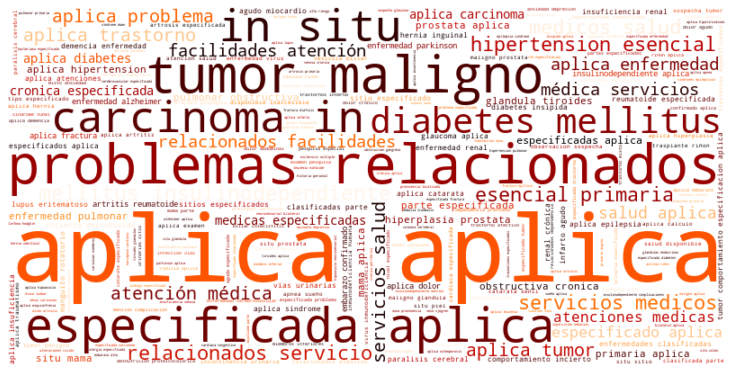

In [31]:
data = PQRD2020
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
palabras = data.preCIE_10.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()